# **Mission 2_주차 등록 수요 데이터 전처리**

## <미션>

 1) [단지별 공통 정보]와 [단지 상세 정보]를 분리하기
 2) 범주형 변수의 category 수 줄이기
 3) [단지별 공통 정보]의 중복행 제거
 4) [단지 상세 정보] 집계를 통해 단지별 정보 구하기 
      * 전용면적 구간별 총 세대수
      * 단지별 임대보증금, 임대료
      * 임대건물구분 비율 (면적 비율)
      * 공급 유형 비율 (면적 비율)
 5) [단지별 공통 정보]와 [단지 상세 정보]의 집계 내용을 합치기 

## <환경설정>

### &nbsp;&nbsp; 1) 라이브러리 불러오기

* 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
* 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

### &nbsp;&nbsp; 2) 한글 폰트 설정하기

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### &nbsp;&nbsp; 3) 데이터 불러오기

* 파일명 : registered_parking_car.csv
* data 변수에 저장하기 

In [3]:
## 코드 입력
file = 'registered_parking_car.csv'
data = pd.read_csv(file)
data.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


<br><br><hr>

## 1. 기본정보 확인하기


* **세부 요구사항**
    - 불러온 데이터의 형태, 기초통계량, 정보 등을 확인합니다.
    - 특히 .info() 를 통해서 각 변수별 데이터타입이 적절한지 확안합니다.

### &nbsp;&nbsp; 1-1) 전체 데이터의 행, 열 개수 확인

In [4]:
## shape
## 코드 입력
data.shape

(2597, 15)

### &nbsp;&nbsp; 1-2) 전체 데이터의 상위 5개 행 확인

In [5]:
## head
## 코드 입력
data.head(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


### &nbsp;&nbsp; 1-3) 전체 데이터의 모든 변수명 (columns) 확인

In [6]:
## columns
## 코드 입력
data.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

### &nbsp;&nbsp; 1-4) 결측치 (N/A) 존재 여부 확인, 각 컬럼의 데이터 타입 확인

In [7]:
## info, isna
## 코드 입력
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2597 non-null   object 
 1   총세대수                          2597 non-null   int64  
 2   임대건물구분                        2597 non-null   object 
 3   지역                            2597 non-null   object 
 4   공급유형                          2597 non-null   object 
 5   전용면적                          2597 non-null   float64
 6   전용면적별세대수                      2597 non-null   int64  
 7   공가수                           2597 non-null   float64
 8   자격유형                          2597 non-null   object 
 9   임대보증금                         2070 non-null   object 
 10  임대료                           2070 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2418 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2593 non-null   float64
 13  단지내

<br><br><hr>

## 2. [단지별 공통 정보]와 [단지 상세 정보] 분리 및 중복 제거

### &nbsp;&nbsp; 3-1) 공통정보/상세정보 분리

 * [단지별 공통 정보] 
    * 대상 컬럼 : 단지코드, 총 세대수, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수, 등록 차량수
    * 변수명 : danji_main
 * [단지 상세 정보] 
    * 대상 컬럼 : 단지 코드, 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 임대보증금, 임대료
    * 변수명 : danji_detail
  

In [72]:
## 단지별 공통 정보 
## 코드 입력
main = ['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '등록차량수']
danji_main = data[main]

## 단지 상세 정보
## 코드 입력
detail = ['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '임대보증금', '임대료']
danji_detail = data[detail]

### &nbsp;&nbsp; 3-2) 전체 데이터의 모든 변수명 (columns) 확인 긴 글자로 된 column명 변경하기

 -  '도보 10분거리 내 지하철역 수(환승노선 수 반영)'  ==> '지하철역수'
 - '도보 10분거리 내 버스정류장 수'  ==> '버스정류장수'

In [73]:
##  컬럼 변경 하기 : rename
## 코드 입력
danji_main = danji_main.rename({'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철역수', '도보 10분거리 내 버스정류장 수':'버스정류장수'}, axis=1)
danji_main.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0
1,C2483,900,경상북도,38.0,0.0,3.0,1015.0
2,C2483,900,경상북도,38.0,0.0,3.0,1015.0
3,C2483,900,경상북도,38.0,0.0,3.0,1015.0
4,C2483,900,경상북도,38.0,0.0,3.0,1015.0


### &nbsp;&nbsp; 3-3) [단지별 공통 정보]의 중복행 제거하기

In [74]:
## 중복행 제거 : drop_duplicates
## 코드 입력
danji_main = danji_main.drop_duplicates()


In [75]:
# 단지 코드별 행 개수를 체크하여 중복 제거가 잘 되었는지 확인  : groupby 활용
# groupby로 count한 값이 1보다 큰 출력값은 중복임
danji_main.groupby(by='단지코드', as_index=False).count()

## '단지코드'별로 그룹핑하여 '총세대수' 열의 개수를 세기 (count)
## unique_check 변수에 저장하기
## 코드 입력
unique_check = danji_main.groupby(by='단지코드', as_index=False)[['총세대수']].count()
# unique_check 데이터프레임의 컬럼명을 ['단지코드','count']로 컬럼 이름 바꾸기 
## 코드 입력
unique_check = unique_check.rename({'총세대수':'count'}, axis=1)
# unique_check 데이터프레임 중 'count'열이 1보다 큰 경우를 조회하기
## 코드 입력
unique_check[unique_check['count']>1]


,단지코드,count


## 4. 범주형 변수의 category 수 줄이기, 숫자형 변수 확인하기 

### &nbsp;&nbsp; 4-1) ‘공급유형’: ‘공공임대(10년)’, ‘공공임대(5년)’…등으로 나뉜 것을 하나의 범주 값인 ‘공공임대’ 로 통합하기

In [76]:
## [단지 상세 정보] '공급유형'의 category 확인하기 : value_counts
## 코드 입력
danji_detail['공급유형'].value_counts()

국민임대         1545
임대상가          527
행복주택          178
공공임대(10년)     167
영구임대          131
공공임대(50년)      31
공공임대(분납)        9
장기전세            6
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [77]:
## ['공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)'] ==> '공공임대'로 수정
## 코드 입력
change_list = ['공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)'] 
change_index = danji_detail[danji_detail['공급유형'].isin(change_list)].index
danji_detail.loc[change_index ,'공급유형'] = '공공임대'

## 확인 : value_counts()
## 코드 입력
danji_detail['공급유형'].value_counts()


국민임대    1545
임대상가     527
공공임대     210
행복주택     178
영구임대     131
장기전세       6
Name: 공급유형, dtype: int64

### &nbsp;&nbsp; 4-2) 숫자가 입력되어야 하는 컬럼에 문자 ‘-’가 입력된 경우를 찾아, 숫자로 변환하기

* 대상 컬럼 찾기 
* object 타입을 int64나 float64로 변환

In [78]:
## [단지 상세 정보]에서 숫자형이어야 하는데 object형으로 보이는 컬럼은 무엇인가요? : info()
## 코드 입력
danji_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2597 non-null   object 
 1   임대건물구분    2597 non-null   object 
 2   공급유형      2597 non-null   object 
 3   전용면적      2597 non-null   float64
 4   전용면적별세대수  2597 non-null   int64  
 5   임대보증금     2070 non-null   object 
 6   임대료       2070 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 142.2+ KB


In [79]:
## 숫자가 아닌 데이터를 찾고 있는 행 찾기
## 코드 입력
danji_detail[danji_detail['임대보증금'].str.isnumeric() == False]


,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,임대보증금,임대료
2257,C1326,아파트,국민임대,24.72,472,-,-
2258,C1326,아파트,국민임대,24.79,104,-,-
2259,C1326,아파트,국민임대,26.83,590,-,-
2260,C1326,아파트,국민임대,37.70,464,-,-
2261,C1326,아파트,국민임대,46.94,304,-,-
2360,C1786,아파트,행복주택,16.91,156,-,-
2361,C1786,아파트,행복주택,26.90,136,-,-
2362,C1786,아파트,행복주택,26.90,72,-,-
2363,C1786,아파트,행복주택,26.90,24,-,-
2551,C2186,아파트,국민임대,29.17,238,-,-


In [80]:
## 숫자가 아닌 데이터를 찾고 있는 행 찾기
## 코드 입력
danji_detail[danji_detail['임대료'].str.isnumeric() == False]

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,임대보증금,임대료
1828,C1397,아파트,장기전세,23.32,51,87444000,-
1829,C1397,아파트,장기전세,46.79,4,174888000,-
1830,C1397,아파트,장기전세,46.91,69,174888000,-
1831,C1397,아파트,장기전세,51.96,24,194562000,-
1832,C1397,아파트,장기전세,51.99,80,194562000,-
1833,C1397,아파트,장기전세,59.93,142,216423000,-
2257,C1326,아파트,국민임대,24.72,472,-,-
2258,C1326,아파트,국민임대,24.79,104,-,-
2259,C1326,아파트,국민임대,26.83,590,-,-
2260,C1326,아파트,국민임대,37.70,464,-,-


In [81]:
## 숫자가 아닌 데이터가 있는 열을 0으로 대체하기
danji_detail = danji_detail.replace({'임대보증금':'-', '임대료':'-'},0)

In [82]:
## 해당 칼럼에  데이터 중 '-' 가 있는지 확인하기
## 코드 입력
danji_detail[(danji_detail['임대보증금'] == '-') | (danji_detail['임대료'] == '-')]

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,임대보증금,임대료


In [83]:
## 해당 칼럼의 dtype을 object --> float로 수정하기 : astype
## 코드 입력
danji_detail['임대보증금'] = danji_detail['임대보증금'].astype('float')
danji_detail['임대료'] = danji_detail['임대료'].astype('float')
## 확인하기 : info
## 코드 입력
danji_detail.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2597 non-null   object 
 1   임대건물구분    2597 non-null   object 
 2   공급유형      2597 non-null   object 
 3   전용면적      2597 non-null   float64
 4   전용면적별세대수  2597 non-null   int64  
 5   임대보증금     2070 non-null   float64
 6   임대료       2070 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 142.2+ KB


<br><br><hr>

## 5. [단지 상세 정보] 집계를 통해 단지별 정보 구하기

### &nbsp;&nbsp; 5-1) 전용면적 구간별 총 세대수 구하기

* [단지 상세 정보]에서 단지코드, 전용면적, 전용면적별세대수 만을 추출하여 base_5_1 에 저장하기
* 전용면적 구간별 세대 수 집계 (groupby)
* 단지 코드를 index로, 전용면적 구간을 컬럼(열)으로 하여 전용면적별세대수 구하기 (pivot)

In [85]:
## [단지 상세 정보]에서 단지코드, 전용면적, 전용면적별세대수 만을 추출하여 base_5_1 에 저장하기
## 코드 입력
base_5_1 = danji_detail[['단지코드', '전용면적', '전용면적별세대수']]
base_5_1.head()

,단지코드,전용면적,전용면적별세대수
0,C2483,39.72,134
1,C2483,39.72,15
2,C2483,51.93,385
3,C2483,51.93,15
4,C2483,51.93,41


,count,mean,std,min,25%,50%,75%,max
전용면적,2597.0,44.60737,32.844454,12.62,32.1,39.84,51.49,583.4


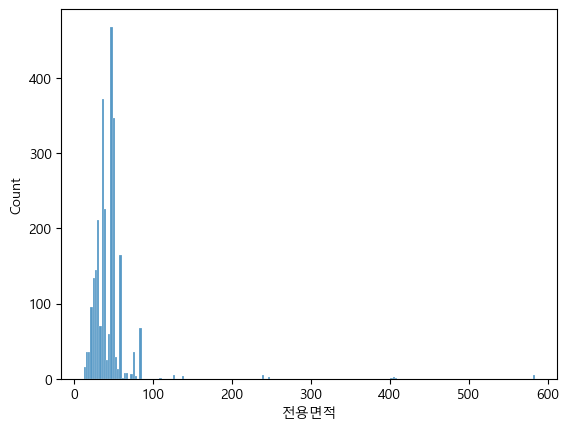

In [90]:
# base_5_1['전용면적'] 데이터의 기초 통계량 확인
## 코드 입력
display(base_5_1[['전용면적']].describe().T)

# base_5_1['전용면적]' 데이터 분포 시각화 확인 (sns.histplot)
## 코드 입력
sns.histplot(x=base_5_1['전용면적'], edgecolor = 'w')
plt.show()


In [96]:
## 전용 면적을 의미있는 구분할 수 있는 구간 나눠보고, 그에 맞는 라벨 설정하기
## 코드 입력
bins = [10, 30, 40, 50, 99, np.inf]
labels = ['전용면적_10_30','전용면적_30_40','전용면적_40_50','전용면적_50_100','전용면적_100이상']

## base_5_1 '전용면적'을 정해진 bins/labels 기준으로 나누고, '전용면적구간'이름으로 추가하기
## 코드 입력
base_5_1['전용면적구간'] = pd.cut(base_5_1['전용면적'], bins = bins, labels = labels)
base_5_1

C:\Users\user\AppData\Local\Temp\ipykernel_9712\2018019538.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_5_1['전용면적구간'] = pd.cut(base_5_1['전용면적'], bins = bins, labels = labels)


,단지코드,전용면적,전용면적별세대수,전용면적구간
0,C2483,39.72,134,전용면적_30_40
1,C2483,39.72,15,전용면적_30_40
2,C2483,51.93,385,전용면적_50_100
3,C2483,51.93,15,전용면적_50_100
4,C2483,51.93,41,전용면적_50_100
...,...,...,...,...
2592,C2532,49.20,19,전용면적_40_50
2593,C2532,51.08,34,전용면적_50_100
2594,C2532,51.73,34,전용면적_50_100
2595,C2532,51.96,114,전용면적_50_100


In [102]:
## 전용면적 구간별 세대수 집계하기 : groupby
## 결과를 group_5_1에 저장하기
## 코드 입력
group_5_1 = base_5_1.groupby(['단지코드','전용면적구간'], as_index=False)[['전용면적별세대수']].sum()

## group_5_1 값 확인하기
## 코드 입력
group_5_1


,단지코드,전용면적구간,전용면적별세대수
0,C1000,전용면적_10_30,0
1,C1000,전용면적_30_40,419
2,C1000,전용면적_40_50,72
3,C1000,전용면적_50_100,75
4,C1000,전용면적_100이상,0
...,...,...,...
1860,C2692,전용면적_10_30,0
1861,C2692,전용면적_30_40,334
1862,C2692,전용면적_40_50,105
1863,C2692,전용면적_50_100,60


In [122]:
## 단지 코드를 index로, 전용면적 구간을 컬럼(열)으로 하여 전용면적별세대수 구하기 (pivot)
## 결과를 result_5_1 저장
## 단지 코드를 index --> 컬럼으로 변경하기 : reset_index, drop=False, inplace=True
## 코드 입력
result_5_1 = group_5_1.pivot(index='단지코드', columns='전용면적구간', values='전용면적별세대수')

result_5_1.reset_index(inplace = True, drop=False)
result_5_1.head()

전용면적구간,단지코드,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적_100이상
0,C1000,0,419,72,75,0
1,C1005,0,0,0,1144,0
2,C1013,0,291,757,260,0
3,C1014,0,516,280,200,0
4,C1015,0,475,380,106,0


### &nbsp;&nbsp; 5-2) 단지별 임대보증금, 임대료 구하기 (평균, 중앙값)

* 단지별 임대보증금, 임대료의 전체 평균/중앙값 구하기

In [123]:
## [단지 상세 정보]에서 단지코드, 임대보증금, 임대료 정보 추출하기 : base_5_2 에 저장
## 코드 입력
base_5_2 = danji_detail[['단지코드', '임대보증금', '임대료']]
base_5_2.head()

,단지코드,임대보증금,임대료
0,C2483,15667000.0,103680.0
1,C2483,15667000.0,103680.0
2,C2483,27304000.0,184330.0
3,C2483,27304000.0,184330.0
4,C2483,27304000.0,184330.0


In [124]:
## 단지별 임대보증금, 임대료 평균값 구하기 : groupby, mean
## group_5_2_mean 저장
## 코드 입력
group_5_2_mean = base_5_2.groupby('단지코드', as_index=False)[['임대보증금', '임대료']].mean()
group_5_2_mean.head()

,단지코드,임대보증금,임대료
0,C1000,1.320357e+07,121064.285714
1,C1005,1.710767e+07,222046.666667
2,C1013,2.492480e+07,134726.000000
3,C1014,2.389400e+07,160488.571429
4,C1015,1.587125e+07,136192.500000


In [125]:
## 단지별 임대보증금, 임대료 중앙값 구하기  : groupby, median
## group_5_2_median 저장
## 코드 입력
group_5_2_median = base_5_2.groupby('단지코드', as_index=False)[['임대보증금', '임대료']].median()
group_5_2_median.head()

,단지코드,임대보증금,임대료
0,C1000,14404000.0,129640.0
1,C1005,16348000.0,210900.0
2,C1013,24665000.0,135960.0
3,C1014,21628000.0,150190.0
4,C1015,15583000.0,140810.0


### &nbsp;&nbsp; <font color="orange">**[도전 미션]** </font>  단지별 임대보증금, 임대료의 가중 평균 구하기

   * 1) 임대보증금 * 세대수, 임대료 * 세대수 구하기 (전용면적별 총 임대보증금, 총 임대료)
   * 2) 단지별 총 임대보증금, 총 임대료, 총 세대수 구하기 (groupby)
   * 3) 임대보증금 가중 평균 = 총 임대보증금 / 총 세대수, 임대료 가중 평균 = 총 임대료 / 총 세대수

In [136]:
base_5_2_1 = danji_detail[['단지코드', '전용면적별세대수', '임대보증금', '임대료']]
base_5_2_1.head()

,단지코드,전용면적별세대수,임대보증금,임대료
0,C2483,134,15667000.0,103680.0
1,C2483,15,15667000.0,103680.0
2,C2483,385,27304000.0,184330.0
3,C2483,15,27304000.0,184330.0
4,C2483,41,27304000.0,184330.0


In [139]:
## [임대보증금, 임대료]  * 전용면적별세대수 ==> [세대수X임대보증금, 세대수X임대료] 구하기
## 코드 입력
base_5_2_1['세대수x임대보증금'] = base_5_2_1['전용면적별세대수'] * base_5_2_1['임대보증금']
base_5_2_1['세대수x임대료'] = base_5_2_1['전용면적별세대수'] * base_5_2_1['임대료']

## 단지별 [세대수X임대보증금, total_임대료] 합계 구하기 : groupby
## group_5_2_weighted_mean 에 저장
## 코드 입력
group_5_2_weighted_mean = base_5_2_1.groupby('단지코드', as_index=False)[['세대수x임대보증금', '세대수x임대료']].sum()
group_5_2_weighted_mean = group_5_2_weighted_mean.rename({'세대수x임대보증금':'total_임대보증금', '세대수x임대료':'total_임대료'}, axis = 1)

## 단지별 [total_임대보증금, total_임대료] 합계를 단지별 총 전용면적별세대수로 나눠 가중 평균 구하기
## 코드 입력
base_5_2_2 = base_5_2_1.groupby('단지코드', as_index=False)[['전용면적별세대수']].sum()

group_5_2_weighted_mean = pd.merge(group_5_2_weighted_mean, base_5_2_2, on='단지코드', how='left')
group_5_2_weighted_mean['임대보증금_wm'] = group_5_2_weighted_mean['total_임대보증금'] / group_5_2_weighted_mean['전용면적별세대수']
group_5_2_weighted_mean['임대료_wm'] = group_5_2_weighted_mean['total_임대료'] / group_5_2_weighted_mean['전용면적별세대수']

group_5_2_weighted_mean.head()


C:\Users\user\AppData\Local\Temp\ipykernel_9712\3948751720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_5_2_1['세대수x임대보증금'] = base_5_2_1['전용면적별세대수'] * base_5_2_1['임대보증금']
C:\Users\user\AppData\Local\Temp\ipykernel_9712\3948751720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_5_2_1['세대수x임대료'] = base_5_2_1['전용면적별세대수'] * base_5_2_1['임대료']


,단지코드,total_임대보증금,total_임대료,전용면적별세대수,임대보증금_wm,임대료_wm
0,C1000,6.733845e+09,60823650.0,566,1.189725e+07,107462.279152
1,C1005,1.923992e+10,249139680.0,1144,1.681811e+07,217779.440559
2,C1013,3.247882e+10,175392620.0,1308,2.483090e+07,134092.217125
3,C1014,1.755086e+10,147813760.0,996,1.762135e+07,148407.389558
4,C1015,1.327353e+10,116580990.0,961,1.381220e+07,121312.164412


* 평균/중앙값/가중 평균 중 대표값 선정하기
*  <font color='red'> **도전 미션을 하지 않아도 평균/중앙값 중에서 대표값 선정해야 함!!!!! [필수]** </font>

In [142]:
## danji_main 데이터에 합칠 정보는 무엇인가? 
## 1) 평균     2) 중앙값    3) 가중평균
## 선택된 정보를 result_5_2 저장하기
## 코드 입력
result_5_2 = group_5_2_weighted_mean[['단지코드','임대보증금_wm', '임대료_wm']]
result_5_2.head()

# 단순한 열의 평균을 구하는 python의 mean 함수 보다는 각 요소(면적과 세대수)를 고려하여
# 평균을 내는 가중평균이 더 적합하다고 생각됨

,단지코드,임대보증금_wm,임대료_wm
0,C1000,1.189725e+07,107462.279152
1,C1005,1.681811e+07,217779.440559
2,C1013,2.483090e+07,134092.217125
3,C1014,1.762135e+07,148407.389558
4,C1015,1.381220e+07,121312.164412


### &nbsp;&nbsp; <font color="orange">**[도전 미션]** </font>  5-3) 임대건물구분 비율 구하기

* 임대건물구분 비율, 공급유형 비율 집계에 필요한 정보만 추출
* 전용면적에 세대수를 반영하여 총면적 열 추가

In [143]:
## [단지 상세 정보]의 ['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수'] 열을 base_5_3 변수에 저장
## 코드 입력
base_5_3 = danji_detail[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수']]

## 전용면적 * 전용면적별세대수 구하기 (열 이름 : 세대수X전용면적)
## 코드 입력
base_5_3['세대수x전용면적'] = base_5_3['전용면적'] * base_5_3['전용면적별세대수']
base_5_3.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9712\1119010260.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_5_3['세대수x전용면적'] = base_5_3['전용면적'] * base_5_3['전용면적별세대수']


,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,세대수x전용면적
0,C2483,아파트,국민임대,39.72,134,5322.48
1,C2483,아파트,국민임대,39.72,15,595.80
2,C2483,아파트,국민임대,51.93,385,19993.05
3,C2483,아파트,국민임대,51.93,15,778.95
4,C2483,아파트,국민임대,51.93,41,2129.13


* 임대건물구분별 면적 비율
    * 단지별 임대건물구분(상가,아파트)별 총 면적 계산
    * 비율로 변환


In [159]:
## 단지코드와 임대건물구분으로 '세대수X전용면적' 집계하기
## group_5_3에 저장
## 코드 입력
group_5_3 = base_5_3.groupby(by=['단지코드', '임대건물구분'], as_index=False)[['세대수x전용면적']].sum()
group_5_3 = group_5_3.rename({'세대수x전용면적':'총면적'}, axis=1)
group_5_3.head()

,단지코드,임대건물구분,총면적
0,C1000,아파트,23871.18
1,C1005,아파트,61136.56
2,C1013,아파트,60105.87
3,C1014,아파트,41309.94
4,C1015,아파트,41381.88


In [176]:
## 단지코드를 index로 임대건물구분을 열로, 총 면적을 값으로 pivot table 구하기
## pivot_5_3 에 저장
## 코드 입력
pivot_5_3 = group_5_3.pivot(index='단지코드', columns='임대건물구분', values='총면적')

## index로 적용된 단지코드를 열로 변경 : reset_index
## 코드 입력
pivot_5_3 = pivot_5_3.reset_index(drop=False)
pivot_5_3.head()


임대건물구분,단지코드,상가,아파트
0,C1000,NaN,23871.18
1,C1005,NaN,61136.56
2,C1013,NaN,60105.87
3,C1014,NaN,41309.94
4,C1015,NaN,41381.88


In [177]:
## pivlot table의 NaN값으로 0으로 대체하기
## 코드 입력
pivot_5_3 = pivot_5_3.fillna(0)
pivot_5_3.head()

임대건물구분,단지코드,상가,아파트
0,C1000,0.0,23871.18
1,C1005,0.0,61136.56
2,C1013,0.0,60105.87
3,C1014,0.0,41309.94
4,C1015,0.0,41381.88


In [183]:
## pivlot table에서 단지별 총 면적 구하기 : 상가면적 + 아파트 면적
## 코드 입력
pivot_5_3['총면적'] = pivot_5_3['상가'] + pivot_5_3['아파트']

## pivlot table에서 상가비율, 아파트비율 구하기 : 상가면적 / (상가+아파트), 아파트면적 / (상가+아파트)
## 코드 입력
pivot_5_3['상가비율'] = pivot_5_3['상가'] / pivot_5_3['총면적']
pivot_5_3['아파트비율'] = pivot_5_3['아파트'] / pivot_5_3['총면적']

## pivot table의 ['단지코드', '상가비율', '아파트비율'] 정보를 result_5_3에 저장하기
## 코드 입력
result_5_3 = pivot_5_3[['단지코드','상가비율', '아파트비율']]
result_5_3.head()

임대건물구분,단지코드,상가비율,아파트비율
0,C1000,0.0,1.0
1,C1005,0.0,1.0
2,C1013,0.0,1.0
3,C1014,0.0,1.0
4,C1015,0.0,1.0


### &nbsp;&nbsp; <font color="orange">**[도전 미션]** </font>  5-4) 공급유형 비율 구하기

* 5-4) 에서 저장된 base_5_3 변수를 이용하여 집계


In [195]:
## 단지코드와 공급유형별로 총면적 집계하기
## group_5_4 저장
## 코드 입력
group_5_4 = base_5_3.groupby(by=['단지코드', '공급유형'], as_index=False)[['세대수x전용면적']].sum()
group_5_4 = group_5_4.rename({'세대수x전용면적':'총면적'}, axis=1)
group_5_4.head()

,단지코드,공급유형,총면적
0,C1000,국민임대,23871.18
1,C1005,국민임대,61136.56
2,C1013,국민임대,60105.87
3,C1014,국민임대,41309.94
4,C1015,국민임대,41381.88


In [197]:
## 단지코드를 index로 공급유형을 열로, '세대수X전용면적'을 값으로 pivot table 구하기
## pivot_5_4 저장
## 코드 입력
pivot_5_4 = group_5_4.pivot(index='단지코드', columns='공급유형', values='총면적')

# index에 적용된 단지코드를 컬럼으로 변경하기 : reset_index
## 코드 입력
pivot_5_4 = pivot_5_4.reset_index(drop = False)
pivot_5_4.head()

공급유형,단지코드,공공임대,국민임대,영구임대,임대상가,장기전세,행복주택
0,C1000,NaN,23871.18,NaN,NaN,NaN,NaN
1,C1005,NaN,61136.56,NaN,NaN,NaN,NaN
2,C1013,NaN,60105.87,NaN,NaN,NaN,NaN
3,C1014,NaN,41309.94,NaN,NaN,NaN,NaN
4,C1015,NaN,41381.88,NaN,NaN,NaN,NaN


In [198]:
## pivlot table의 NaN값으로 0으로 대체하기
## 코드 입력
pivot_5_4 = pivot_5_4.fillna(0)
pivot_5_4.head()

공급유형,단지코드,공공임대,국민임대,영구임대,임대상가,장기전세,행복주택
0,C1000,0.0,23871.18,0.0,0.0,0.0,0.0
1,C1005,0.0,61136.56,0.0,0.0,0.0,0.0
2,C1013,0.0,60105.87,0.0,0.0,0.0,0.0
3,C1014,0.0,41309.94,0.0,0.0,0.0,0.0
4,C1015,0.0,41381.88,0.0,0.0,0.0,0.0


In [199]:
## pivot table의 공급유형별 면적을 모두 더해 '총면적' 구하기
## 코드 입력
pivot_5_4['총면적'] = pivot_5_4['공공임대'] + pivot_5_4['국민임대'] + pivot_5_4['영구임대'] + pivot_5_4['임대상가'] + pivot_5_4['장기전세'] + pivot_5_4['행복주택']

## pivot_5_4에서 공규유형별 면적 비율 구하기 : 각 면적 / 총면적
## 코드 입력
pivot_5_4['공공임대비율'] = pivot_5_4['공공임대'] / pivot_5_4['총면적']
pivot_5_4['국민임대비율'] = pivot_5_4['국민임대'] / pivot_5_4['총면적']
pivot_5_4['영구임대비율'] = pivot_5_4['영구임대'] / pivot_5_4['총면적']
pivot_5_4['임대상가비율'] = pivot_5_4['임대상가'] / pivot_5_4['총면적']
pivot_5_4['장기전세비율'] = pivot_5_4['장기전세'] / pivot_5_4['총면적']
pivot_5_4['행복주택비율'] = pivot_5_4['행복주택'] / pivot_5_4['총면적']

## 단지 코드의 공급유형별 면적 비율을 result_5_4에 저장하기 
## 코드 입력
result_5_4 = pivot_5_4[['단지코드', '공공임대비율', '국민임대비율', '영구임대비율', '임대상가비율', '장기전세비율', '행복주택비율']]
result_5_4.head()


공급유형,단지코드,공공임대비율,국민임대비율,영구임대비율,임대상가비율,장기전세비율,행복주택비율
0,C1000,0.0,1.0,0.0,0.0,0.0,0.0
1,C1005,0.0,1.0,0.0,0.0,0.0,0.0
2,C1013,0.0,1.0,0.0,0.0,0.0,0.0
3,C1014,0.0,1.0,0.0,0.0,0.0,0.0
4,C1015,0.0,1.0,0.0,0.0,0.0,0.0


<br><br><hr>

## 6. [단지별 공통 정보]에 [단지 상세 정보] 집계 내용을 합치기 

* [단지별 공통 정보] : **danji_main**
* [단지 상세 정보] 집계
   * 전용 면적 구간별 세대수 : **result_5_1**
   * 임대보증금/임대료 : **result_5_2
   * 임대건물구분별 면적 비율 : **result_5_3**
   * 공급유형별 면적 비율 : **result_5_4**
* 합치기 :  merge를 사용할 때, **how = 'left', on = '단지코드'** 옵션 이용

### 6-1) 단지별 공통 정보 + 전용면적 구간별 세대수

In [200]:
## result 변수에 저장하기
## 코드 입력
result = pd.merge(danji_main, result_5_1, how='left', on='단지코드')
result.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적_100이상
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,751,0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,132,0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,124,0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,515,0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,246,0


### 6-2)  result + 임대보증금/임대료

In [201]:
## 코드 입력
result = pd.merge(result, result_5_2, how='left', on='단지코드')
result.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적_100이상,임대보증금_wm,임대료_wm
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,751,0,2.566916e+07,173838.877778
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,132,0,1.403597e+07,119431.266055
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,124,0,2.760498e+07,171132.236842
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,515,0,2.244915e+07,187414.211921
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,246,0,1.939399e+07,125449.224138


### 6-3) result + 임대건물구분별 면적 비율 (도전 미션 완료 시)

In [202]:
## 코드 입력
result = pd.merge(result, result_5_3, how='left', on='단지코드')
result.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,전용면적_50_100,전용면적_100이상,임대보증금_wm,임대료_wm,상가비율,아파트비율
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,751,0,2.566916e+07,173838.877778,0.0,1.0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,132,0,1.403597e+07,119431.266055,0.0,1.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,124,0,2.760498e+07,171132.236842,0.0,1.0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,515,0,2.244915e+07,187414.211921,0.0,1.0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,246,0,1.939399e+07,125449.224138,0.0,1.0


### 6-4) 공급유형별 면적 비율 (도전 미션 완료 시)

In [203]:
## 코드 입력
result = pd.merge(result, result_5_4, how='left', on='단지코드')
result.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,...,임대보증금_wm,임대료_wm,상가비율,아파트비율,공공임대비율,국민임대비율,영구임대비율,임대상가비율,장기전세비율,행복주택비율
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,...,2.566916e+07,173838.877778,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,...,1.403597e+07,119431.266055,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,...,2.760498e+07,171132.236842,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,...,2.244915e+07,187414.211921,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,...,1.939399e+07,125449.224138,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


##  7. 데이터셋 저장하기

* registerd_parking_preprocessed.csv 파일로 저장하기

In [207]:
## 코드 입력
name = 'registered_parking_preprocessed.csv'
result.to_csv(name, index=False)

check = pd.read_csv(name)
check.head()

,단지코드,총세대수,지역,공가수,지하철역수,버스정류장수,등록차량수,전용면적_10_30,전용면적_30_40,전용면적_40_50,...,임대보증금_wm,임대료_wm,상가비율,아파트비율,공공임대비율,국민임대비율,영구임대비율,임대상가비율,장기전세비율,행복주택비율
0,C2483,900,경상북도,38.0,0.0,3.0,1015.0,0,149,0,...,2.566916e+07,173838.877778,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,C2515,545,경상남도,17.0,0.0,3.0,205.0,0,356,57,...,1.403597e+07,119431.266055,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,C1407,1216,대전광역시,13.0,1.0,1.0,1064.0,0,390,702,...,2.760498e+07,171132.236842,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,C1945,755,경기도,6.0,1.0,3.0,730.0,0,240,0,...,2.244915e+07,187414.211921,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,C1470,696,전라북도,14.0,0.0,2.0,553.0,0,254,196,...,1.939399e+07,125449.224138,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## <font color="green"> **Mission Clear** </font> &nbsp; &nbsp; 수고하셨습니다!!